# HINDCAST DATA MSC50 Numerical Model
### Data frame created by horizontally merging gridpoints on Datetime

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.stats import f_oneway
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#read in data from ASCII format for Grid point GN018918 and

file_path1 = 'GN018918.opr_dump'
with open(file_path1, 'r') as file:
    data1 = file.read()
    
print(data1[:1500])

file_path2 = 'GN019006.opr_dump'
with open(file_path2, 'r') as file: 
    data2 = file.read()
    
print(data2[:1500])

file_path3 = 'GN018919.opr_dump'
with open(file_path3, 'r') as file: 
    data2 = file.read()
    
print(data2[:1500])

 Gpt 018918, Lat 48.7500, Long 233.7500, Depth  432.1110
 OCEANWEATHER BIT-PACKED TIME SERIES - c:\temp\pacific\GN018918.opr
 Fields in this time series:
  CCYYMM      - Century, Year, Month
  DDHHmm      - Day, Hour, Minute (ut)
  WD          - Wind Direction (deg from which)
  WS          - Wind Speed (m/s)
  ETOT        - Total Variance of Total Spectrum (m^2)
  TP          - Peak Spectral Period of Total Spectrum (sec)
  VMD         - Vector Mean Direction of Total Spectrum (deg to which)
  ETTSea      - Total Variance of Primary Partition (m^2)
  TPSea       - Peak Spectral Period of Primary Partition (sec)
  VMDSea      - Vector Mean Direction of Primary Partition (deg to which)
  ETTSw       - Total Variance of Secondary Partition (m^2)
  TPSw        - Peak Spectral Period of Secondary Partition (sec)
  VMDSw       - Vector Mean Direction of Secondary Partition (deg to which)
  MO1         - First Spectral Moment of Total Spectrum (m^2/s)
  MO2         - Second Spectral Moment o

### Data Dictionary

 Fields in this time series:
 - CCYYMM      - Century, Year, Month
 - DDHHmm      - Day, Hour, Minute (ut)
 - WD          - Wind Direction (deg from which)
 - WS          - Wind Speed (m/s)
 - ETOT        - Total Variance of Total Spectrum (m^2)
 - TP          - Peak Spectral Period of Total Spectrum (sec)
 - VMD         - Vector Mean Direction of Total Spectrum (deg to which)
 - ETTSea      - Total Variance of Primary Partition (m^2)
 - TPSea       - Peak Spectral Period of Primary Partition (sec)
 - VMDSea      - Vector Mean Direction of Primary Partition (deg to which)
 - ETTSw       - Total Variance of Secondary Partition (m^2)
 - TPSw        - Peak Spectral Period of Secondary Partition (sec)
 - VMDSw       - Vector Mean Direction of Secondary Partition (deg to which)
 - MO1         - First Spectral Moment of Total Spectrum (m^2/s)
 - MO2         - Second Spectral Moment of Total Spectrum (m^2/s^2)
 - HS          - Significant Wave Height (m)
 - DMDIR       - Dominant Direction (deg to which)
 - ANGSPR      - Angular Spreading Function
 - INLINE      - In-Line Variance Ratio

### Description
Hindcast Data from the MSC50 Numerical model. Data is taken from 3 gridpoints: 
- GN018918 : lat 48.7500 lon -126.2500, Depth 432.1110
- GN019006 : lat 49.0625, lon -126.2500, Depth   82.7388
- GN018919 : lat 48.7500 lon -125.6250, Depth 85.9252
Data is archived every 3 hour period from 1980-01 to 2015-12 https://meds-sdmm.dfo-mpo.gc.ca/isdm-gdsi/waves-vagues/MSC50-eng.html



In [3]:
# Define column names based on the provided headers
column_names = ["CCYYMM", "DDHHmm", "WD", "WS", "ETOT", "TP", "VMD", "ETTSea", "TPSea", "VMDSea", 
                "ETTSw", "TPSw", "VMDSw", "MO1", "MO2", "HS", "DMDIR", "ANGSPR", "INLINE"]

# Read data into a DataFrame
df1 = pd.read_csv(file_path1, skiprows=25, delim_whitespace=True, names=column_names) #skip header (first 25 rows)
df2= pd.read_csv(file_path2, skiprows=25, delim_whitespace =True, names = column_names)
df3 = pd.read_csv(file_path3, skiprows=25, delim_whitespace=True, names = column_names)

df3.head()

,CCYYMM,DDHHmm,WD,WS,ETOT,TP,VMD,ETTSea,TPSea,VMDSea,ETTSw,TPSw,VMDSw,MO1,MO2,HS,DMDIR,ANGSPR,INLINE
0,198001,10600,177.3,7.60,0.760,12.374,24.8,0.127,5.598,5.9,0.633,12.374,28.2,0.547,0.487,3.488,25.4,0.8749,0.7952
1,198001,10900,195.1,6.01,0.681,12.351,27.1,0.054,4.158,14.1,0.626,12.351,28.1,0.489,0.432,3.300,27.7,0.8791,0.8017
2,198001,11200,227.0,4.41,0.602,12.235,29.6,0.015,3.590,36.7,0.586,12.235,29.5,0.430,0.371,3.103,29.9,0.8827,0.8063
3,198001,11500,219.3,4.82,0.535,12.035,32.0,0.019,3.391,37.2,0.515,12.035,31.9,0.382,0.329,2.925,32.1,0.8834,0.8067
4,198001,11800,212.8,5.23,0.482,11.818,34.4,0.026,3.818,33.1,0.456,11.818,34.5,0.349,0.306,2.776,34.1,0.8809,0.8022


In [4]:
df1_shape = df1.shape
df2_shape = df2.shape
df3_shape = df3.shape
print('df1:',df1_shape)
print('df2:',df2_shape)
print('df3:',df3_shape)

df1: (105190, 19)
df2: (105190, 19)
df3: (105190, 19)


In [5]:
#Define function for converting CCYYMM, DDHHmm into single datetime column


def process_datetime_columns(df, CCYYMM_col, DDHHmm_col):
    # Convert 'CCYYMM' and 'DDHHmm' to datetime format and combine into one column
    df['year_month'] = pd.to_datetime(df[CCYYMM_col].astype(str), format='%Y%m')
    
    # Extract components of day, hour, and minute, convert to string to slice, then convert back to int
    df['DDHHmm_str'] = df[DDHHmm_col].astype(str)
    df['day'] = df['DDHHmm_str'].str[:2].astype(int)
    df['hour'] = df['DDHHmm_str'].str[2:4].astype(int)
    df['minute'] = df['DDHHmm_str'].str[4:].astype(int)

    # Convert each component into timedelta to be combined with date time
    day_timedelta = pd.to_timedelta(df['day'], unit='D')
    hour_timedelta = pd.to_timedelta(df['hour'], unit='H')
    minute_timedelta = pd.to_timedelta(df['minute'], unit='m')

    # Combine into one column
    df['Datetime'] = pd.to_datetime(df['year_month']) + day_timedelta + hour_timedelta + minute_timedelta

    # Drop specified columns
    df = df.drop(['year_month', 'CCYYMM', 'DDHHmm', 'DDHHmm_str', 'day', 'hour', 'minute'], axis=1)

    return df



In [6]:
df1=process_datetime_columns(df1,'CCYYMM','DDHHmm')


In [7]:
df2=process_datetime_columns(df2,'CCYYMM','DDHHmm')
df3=process_datetime_columns(df3,'CCYYMM','DDHHmm')

#used df.info() to confirm


## Join Data frames for each Gridpoint
Each gridpoint represents the same  variables across the same time range for a different location. 
Data frames will be concatenated horizontally. Each Gridpoint will be assigned a value to differentiate between gridpoint variables: 

- Gridpoint GN019006: assigned "A" 
- Gridpoint GN018918: assigned "B"
- Gridpoint GN018919: assigned "C" 

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105190 entries, 0 to 105189
Data columns (total 18 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   WD        105190 non-null  float64       
 1   WS        105190 non-null  float64       
 2   ETOT      105190 non-null  float64       
 3   TP        105190 non-null  float64       
 4   VMD       105190 non-null  float64       
 5   ETTSea    105190 non-null  float64       
 6   TPSea     105190 non-null  float64       
 7   VMDSea    105190 non-null  float64       
 8   ETTSw     105190 non-null  float64       
 9   TPSw      105190 non-null  float64       
 10  VMDSw     105190 non-null  float64       
 11  MO1       105190 non-null  float64       
 12  MO2       105190 non-null  float64       
 13  HS        105190 non-null  float64       
 14  DMDIR     105190 non-null  float64       
 15  ANGSPR    105190 non-null  float64       
 16  INLINE    105190 non-null  float64    

In [9]:
#add suffix to column name, excluding the Datetime column : 
df1.columns = [col + '_B' if col != 'Datetime' else col for col in df1.columns]
df2.columns = [col + '_A' if col != 'Datetime' else col for col in df2.columns]
df3.columns = [col + '_C' if col != 'Datetime' else col for col in df3.columns]

#Concat horizontally on Datetime column
df = pd.concat([df1.set_index('Datetime'), df2.set_index('Datetime'), df3.set_index('Datetime')], axis=1)

df = df.reset_index() #make Datetime a regular column again

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105190 entries, 0 to 105189
Data columns (total 52 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   Datetime  105190 non-null  datetime64[ns]
 1   WD_B      105190 non-null  float64       
 2   WS_B      105190 non-null  float64       
 3   ETOT_B    105190 non-null  float64       
 4   TP_B      105190 non-null  float64       
 5   VMD_B     105190 non-null  float64       
 6   ETTSea_B  105190 non-null  float64       
 7   TPSea_B   105190 non-null  float64       
 8   VMDSea_B  105190 non-null  float64       
 9   ETTSw_B   105190 non-null  float64       
 10  TPSw_B    105190 non-null  float64       
 11  VMDSw_B   105190 non-null  float64       
 12  MO1_B     105190 non-null  float64       
 13  MO2_B     105190 non-null  float64       
 14  HS_B      105190 non-null  float64       
 15  DMDIR_B   105190 non-null  float64       
 16  ANGSPR_B  105190 non-null  float64    

In [13]:
df.isnull().sum()

Datetime    0
WD_B        0
WS_B        0
ETOT_B      0
TP_B        0
VMD_B       0
ETTSea_B    0
TPSea_B     0
VMDSea_B    0
ETTSw_B     0
TPSw_B      0
VMDSw_B     0
MO1_B       0
MO2_B       0
HS_B        0
DMDIR_B     0
ANGSPR_B    0
INLINE_B    0
WD_A        0
WS_A        0
ETOT_A      0
TP_A        0
VMD_A       0
ETTSea_A    0
TPSea_A     0
VMDSea_A    0
ETTSw_A     0
TPSw_A      0
VMDSw_A     0
MO1_A       0
MO2_A       0
HS_A        0
DMDIR_A     0
ANGSPR_A    0
INLINE_A    0
WD_C        0
WS_C        0
ETOT_C      0
TP_C        0
VMD_C       0
ETTSea_C    0
TPSea_C     0
VMDSea_C    0
ETTSw_C     0
TPSw_C      0
VMDSw_C     0
MO1_C       0
MO2_C       0
HS_C        0
DMDIR_C     0
ANGSPR_C    0
INLINE_C    0
dtype: int64

In [15]:
df.to_csv('Hindcast_3gridpoints_horizontal_ondate')

In [18]:
df[['ETOT_A', 'ETOT_B', 'ETOT_C']].describe()

,ETOT_A,ETOT_B,ETOT_C
count,105190.000000,105190.000000,105190.000000
mean,0.394087,0.497183,0.363363
std,0.411136,0.520859,0.384545
min,0.012000,0.022000,0.011000
25%,0.141000,0.183000,0.127000
50%,0.253000,0.323000,0.230000
75%,0.494000,0.616000,0.457000
max,6.637000,9.449000,5.786000


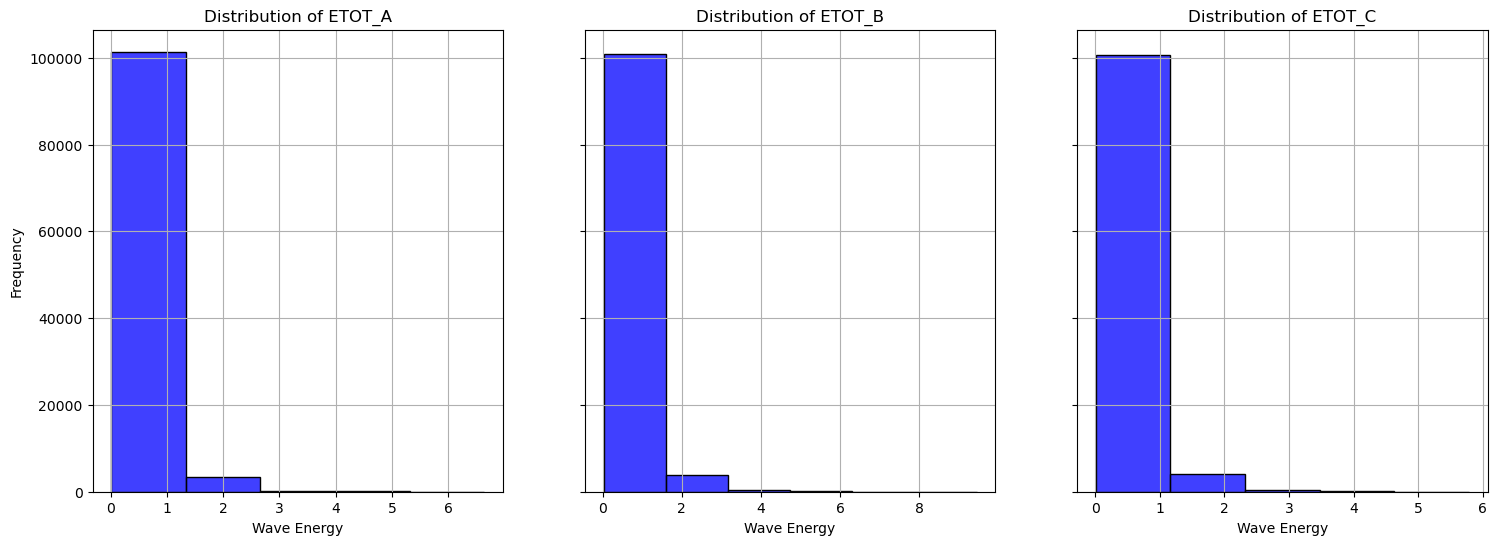

In [21]:
# Select the columns of interest
wave_energy = df[['ETOT_A', 'ETOT_B', 'ETOT_C']]

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6), sharey=True)

# Plot histograms for each column
for i, col in enumerate(wave_energy.columns):
    # Calculate bins separately for each column
    bin_num = int(np.ceil((wave_energy[col].max() - wave_energy[col].min()) / (3.5 * wave_energy[col].std())))
    
    sns.histplot(wave_energy[col], color='blue', edgecolor='black', bins=bin_num, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_ylabel('Frequency')
    axes[i].set_xlabel('Wave Energy')
    axes[i].grid(True)

plt.show()



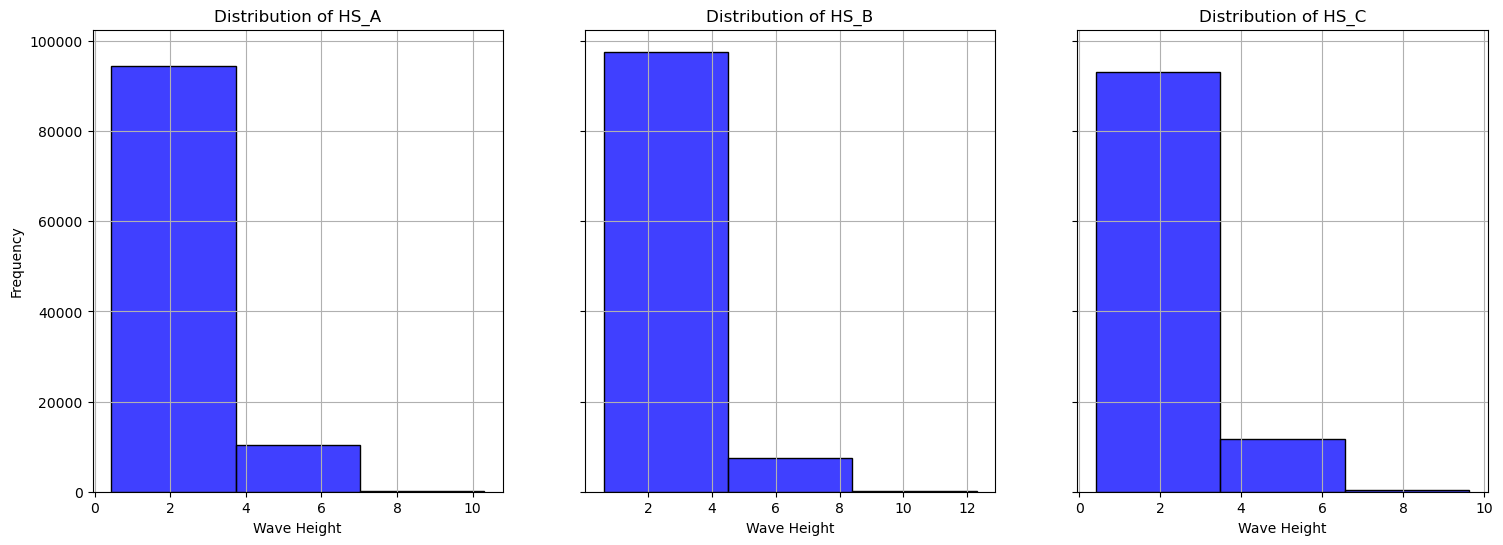

In [23]:
# Select the columns of interest
wave_height = df[['HS_A', 'HS_B', 'HS_C']]

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6), sharey=True)

# Plot histograms for each column
for i, col in enumerate(wave_height.columns):
    # Calculate bins separately for each column
    bin_num = int(np.ceil((wave_height[col].max() - wave_height[col].min()) / (3.5 * wave_height[col].std())))
    
    sns.histplot(wave_height[col], color='blue', edgecolor='black', bins=bin_num, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_ylabel('Frequency')
    axes[i].set_xlabel('Wave Height')
    axes[i].grid(True)

plt.show()



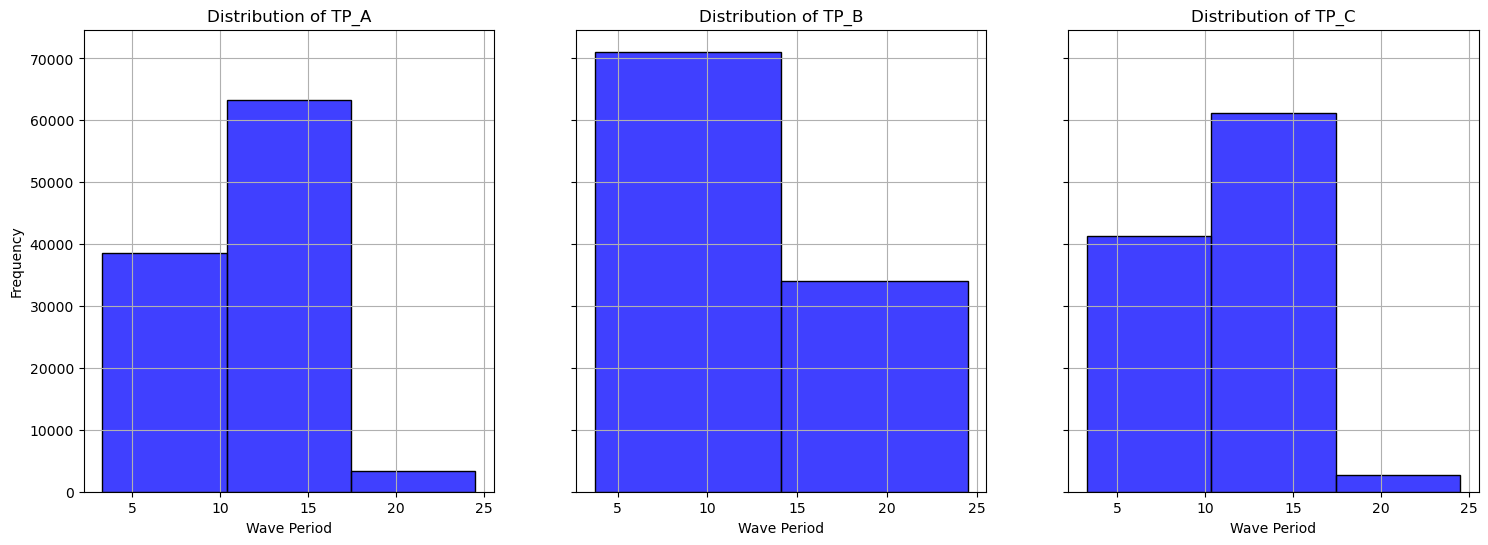

In [24]:
# Select the columns of interest
wave_period = df[['TP_A', 'TP_B', 'TP_C']]

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6), sharey=True)

# Plot histograms for each column
for i, col in enumerate(wave_period.columns):
    # Calculate bins separately for each column
    bin_num = int(np.ceil((wave_period[col].max() - wave_period[col].min()) / (3.5 * wave_period[col].std())))
    
    sns.histplot(wave_period[col], color='blue', edgecolor='black', bins=bin_num, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_ylabel('Frequency')
    axes[i].set_xlabel('Wave Period')
    axes[i].grid(True)

plt.show()

Wave Period is taken from variable "TP" defined as the peak spectral period of total spectrum in s. 
Gridpoint A and C are closer to shore than Gridpoint B. Perhaps as wave energy travels through water the period is shortened as the steepness of the ocean floor becomes more inclined towards the shore. 